In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

df=pd.read_csv("NFL_data_super_cleaned.csv")

In [11]:
# check for null values
df.isnull().any()

posteam                      False
yardline_100                 False
quarter_seconds_remaining    False
qtr                          False
down                         False
goal_to_go                   False
ydstogo                      False
score_margin                 False
play_type                    False
dtype: bool

In [12]:
pd.unique(df['play_type'])
pd.unique(df['posteam'])

array(['PIT', 'TEN', 'CLE', 'MIN', 'NO', 'DET', 'DAL', 'TB', 'HOU', 'NYJ',
       'IND', 'JAX', 'DEN', 'CIN', 'CAR', 'PHI', 'KC', 'BAL', 'ATL',
       'MIA', 'ARI', 'SF', 'SEA', 'LAR', 'NYG', 'WAS', 'GB', 'CHI', 'NE',
       'BUF', 'LV', 'LAC'], dtype=object)

In [13]:
dfnew=pd.get_dummies(df, columns=['play_type'])
dfnew

,posteam,yardline_100,quarter_seconds_remaining,qtr,down,goal_to_go,ydstogo,score_margin,play_type_kick,play_type_pass,play_type_run
0,PIT,58.0,893.0,1,1.0,0.0,10,0.0,0,1,0
1,PIT,53.0,856.0,1,2.0,0.0,5,0.0,0,0,1
2,PIT,56.0,815.0,1,3.0,0.0,8,0.0,0,1,0
3,PIT,56.0,807.0,1,4.0,0.0,8,0.0,1,0,0
4,TEN,98.0,796.0,1,1.0,0.0,10,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
352376,CAR,71.0,82.0,4,2.0,0.0,1,-5.0,0,1,0
352377,CAR,71.0,77.0,4,3.0,0.0,1,-5.0,0,1,0
352378,CAR,66.0,63.0,4,2.0,0.0,10,-5.0,0,1,0
352379,CAR,66.0,58.0,4,3.0,0.0,10,-5.0,0,1,0


In [14]:
le=LabelEncoder()

In [15]:
df['encoded_team']=le.fit_transform(df['posteam'])

In [16]:
x_train, x_test, y_train, y_test = train_test_split(df[['encoded_team','yardline_100','quarter_seconds_remaining','qtr', 'down', 'goal_to_go', 'ydstogo', 'score_margin']],df['play_type'], test_size=0.25)

In [17]:
# Scale Data
scaler=StandardScaler()
x_train_scale=scaler.fit_transform(x_train)
x_test_scale=scaler.transform(x_test)

In [18]:
# Build and Fit LR Model 
model=linear_model.LogisticRegression(multi_class="multinomial")
model.fit(x_train, y_train)
predictions=model.predict(x_test)

c:\Users\noell\Anaconda3\envs\ecs-171-base\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score: 0.5744528695968035
              precision    recall  f1-score   support

        kick       0.43      0.22      0.29      8462
        pass       0.58      0.77      0.66     46396
         run       0.58      0.40      0.47     33238

    accuracy                           0.57     88096
   macro avg       0.53      0.46      0.47     88096
weighted avg       0.57      0.57      0.55     88096

Confusion matrix, without normalization
[[ 1867  6551    44]
 [ 1151 35554  9691]
 [ 1300 18752 13186]]
Normalized confusion matrix
[[0.22063342 0.77416686 0.00519972]
 [0.02480817 0.76631606 0.20887577]
 [0.03911186 0.56417354 0.3967146 ]]


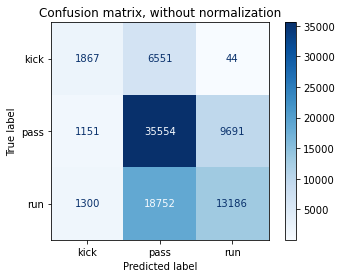

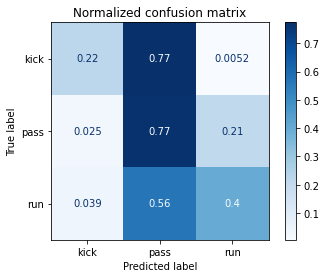

In [29]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

model.score(x_test, y_test)

print("Accuracy score:", model.score(x_test, y_test))
print(classification_report(y_test, predictions))


# Plot non-normalized confusion matrix and normalized confusion matrix

# Confusion matrix code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        x_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.savefig("logreg-con-matrix.png")
plt.show()